$$
\frac{1}{\nu} \frac{\partial \Phi}{\partial t} = \nu \Sigma_f \Phi - \Sigma_a \Phi + D \nabla^2 \Phi
$$

시간에 따른 중성자속(fLUX)의 변화율 = 중성자 생성률 - 중성자 흡수율 + 중성자 누설
ν : 중성자 생성 계수(각 핵 분열에서 생성되는 평균 중성자 수)

중성자 플럭스 = 단위부피당 중성자 수(중성자 밀도)*평균 속도

갯수/부피 * 길이/시간 = 갯수/면적*시간 =플럭스 단위.

일단 2차원이라 가정해보자.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

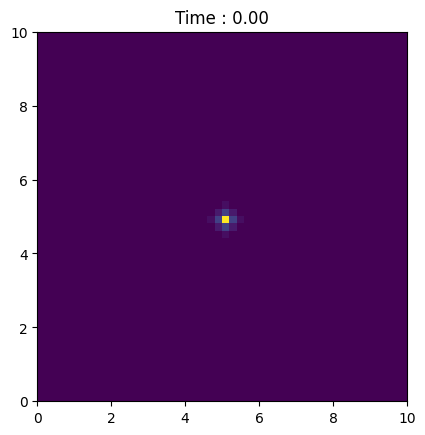

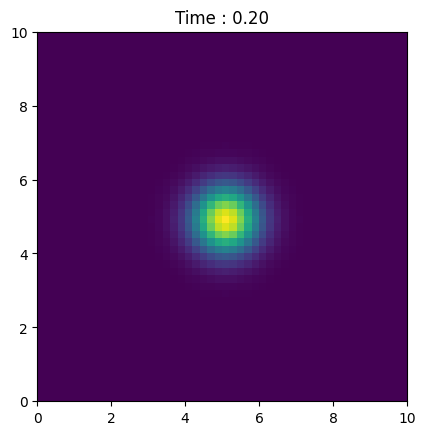

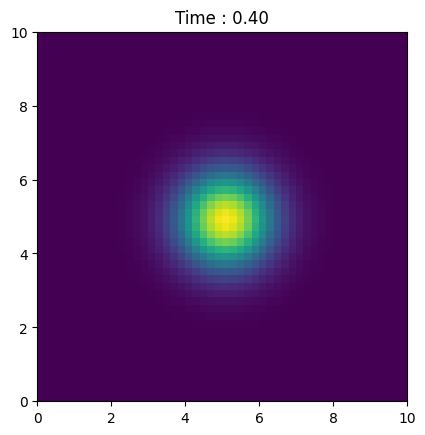

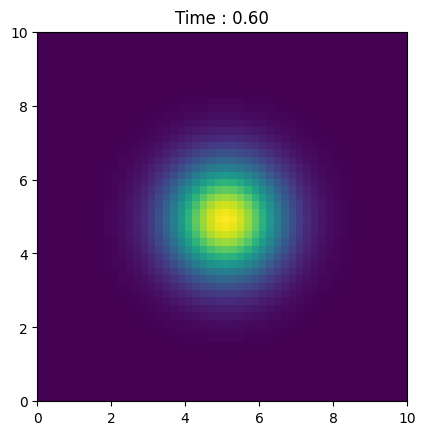

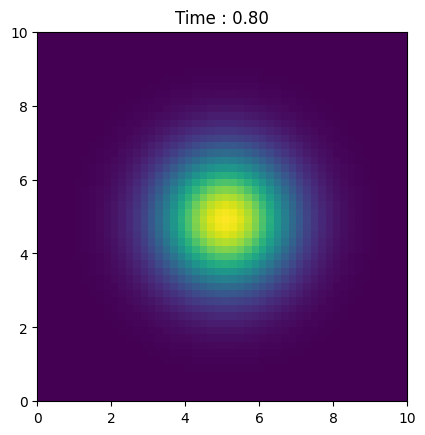

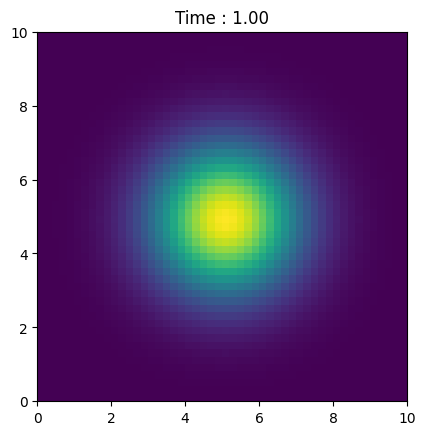

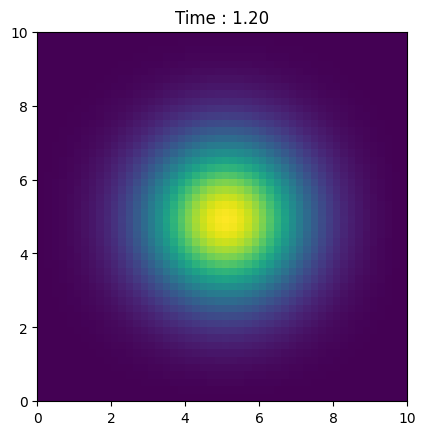

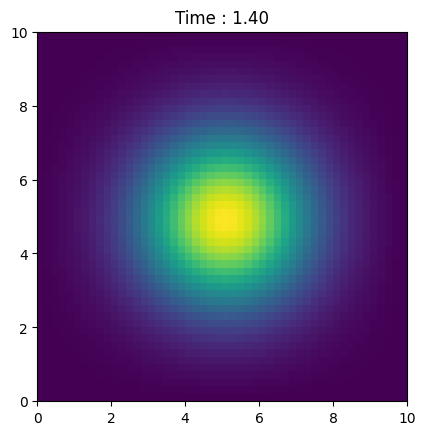

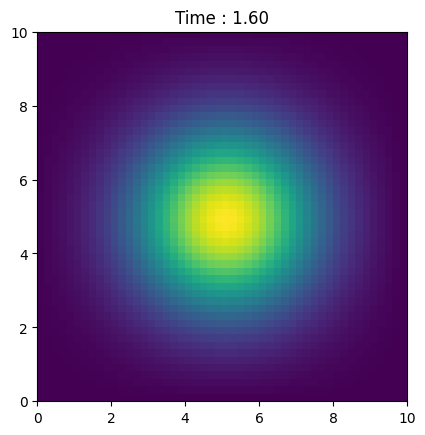

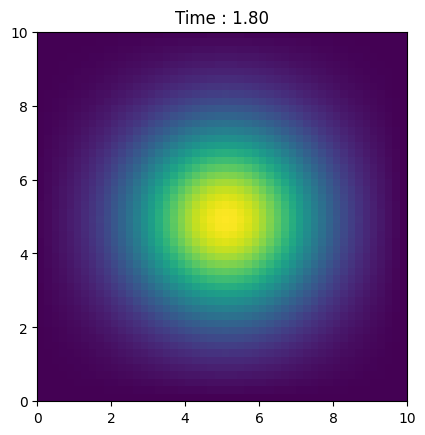

In [75]:
# 파라미터 설정
Lx = 10.0  # x 방향 크기
Ly = 10.0  # y 방향 크기
Nx = 50  # x 방향 격자 수
Ny = 50  # y 방향 격자 수
dx = Lx / (Nx - 1)  # x 방향 격자 간격
dy = Ly / (Ny - 1)  # y 방향 격자 간격
dt = 0.01  # 시간 간격
T = 2    # 총 시뮬레이션 시간
D = 1.0  # 확산 계수
sigma_a = 0.1
sigma_f = 0.05
nu = 2.4    # 중성자 생성 계수

# 초기 조건 설정
phi = np.zeros((Nx, Ny))  # 중성자 플럭스 초기화
phi[int(Nx/2), int(Ny/2)] = 1.0  # 중심에 초기 플럭스 설정

# 중성자 확산 방정식 우항 -> 2차원이면, x축방향, y축방향에 대해 계산 필요.
# 라플라시안 -> 2계 미분
def func(phi):
    Nx, Ny = phi.shape

    # 새로운 배열을 만들어서 2계 미분 근사값 저장
    d2phi_dx2 = np.zeros_like(phi)
    d2phi_dy2 = np.zeros_like(phi)

    # 라플라시안 -> 2계 미분 -> 중앙차분법으로 시도함.

    # x 방향 2차 미분 중앙차분법
    for i in range(Nx-1):
        for j in range(Ny):
            d2phi_dx2[i, j] = (phi[i+1, j] - 2*phi[i, j] + phi[i-1, j]) / dx**2

    # y 방향 2차 미분
    for i in range(Nx):
        for j in range(Ny-1):
            d2phi_dy2[i, j] = (phi[i, j+1] - 2*phi[i, j] + phi[i, j-1]) / dy**2

    # 라플라시안 계산
    laplacian = d2phi_dx2 + d2phi_dy2
    d2phi = laplacian
    return D * d2phi - sigma_a * phi + nu * sigma_f * phi


# 시뮬레이션
times = []
fluxes = []

# RK4 method 잘못 썼음.
for t in np.arange(0, T, dt):
    k1 = dt * func(phi)
    k2 = dt * func(phi + 0.5 * k1)
    k3 = dt * func(phi + 0.5 * k2)
    k4 = dt * func(phi + k3)

    phi_new = phi + (k1 + 2*k2 + 2*k3 + k4) / 6

    # 플럭스 업데이트
    phi = phi_new

    # 20번 마다 결과 저장
    if (t / dt) % 20 == 0:
        times.append(t)
        fluxes.append(phi)

# 결과 시각화
for i, flux in enumerate(fluxes):
    plt.imshow(flux, extent=[0, Lx, 0, Ly])
    plt.title(f'Time : {times[i]:.2f}')
    plt.show()
